# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

**I chose the Airbnb NYC "listings" data set. My question is "can we predit whether an Airbnb listing in NYC will receive a high review score (rating >= 4.9) based on specific features"? This is a binary classification problem, where listings are classified as either "high-rated" or "not high rated". The label will be "high_rating", which is a new binary column I'll create from "review_scores_rating". The listing will be labeled 1 if "review_scores_rating >= 4.9, or else 0. The features (initially, but subject to adjustments) are room_type, accommodates, bathrooms, bedrooms, beds, host_response rate, host_acceptance_rate, host_is_superhost, number_of_reviews, reviews_per_month,review_scores_cleanliness, and review_scores_checkin.**

**This is an important problem because knowing this information can benefit both the Airbnb and the hosts. Airbnb can use this model to flag potential red flag listings or promote listings with high predicted guest satisfaction. Hosts can gain insight into what features most contribute to the guest experience and thus adjust those features for improvement.**

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

**Notes:**

1. Missing values: fill with mean, unknown, or drop
2. Feature Engineering: convert features to binary, one hot encode categorical variables
3. Outlier: check for extreme values
4. New label: high_rating
5. Model Selection: can use multiple - logistic regression, random forest, gradient boosting
6. Testing: use 80/20 for training/testing; evaluate for accuracy, precision, recall, AUC

In [3]:
print(df.head)

<bound method NDFrame.head of                                                     name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2               Spacious Brooklyn Duplex, Patio + Garden   
3                       Large Furnished Room Near B'way　   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
28017                            Astoria Luxury suite 2A   
28018  Newly renovated suite in the heart of Williams...   
28019      Perfect Room to Stay in Brooklyn! Near Metro!   
28020       New Beautiful Modern One Bedroom in Brooklyn   
28021    Large, modern, private 1 bedroom in beach condo   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      We welcome you to stay in our lovely 2 br dupl...   
3      Pl

In [4]:
print(df.describe())

       host_response_rate  host_acceptance_rate  host_listings_count  \
count        16179.000000          16909.000000         28022.000000   
mean             0.906901              0.791953            14.554778   
std              0.227282              0.276732           120.721287   
min              0.000000              0.000000             0.000000   
25%              0.940000              0.680000             1.000000   
50%              1.000000              0.910000             1.000000   
75%              1.000000              1.000000             3.000000   
max              1.000000              1.000000          3387.000000   

       host_total_listings_count  accommodates     bathrooms      bedrooms  \
count               28022.000000  28022.000000  28022.000000  25104.000000   
mean                   14.554778      2.874491      1.142174      1.329708   
std                   120.721287      1.860251      0.421132      0.700726   
min                     0.000000      1

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

In [6]:
print(df.isnull().sum())

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [7]:
missing = df.isnull().sum()
missing[missing > 0].sort_values()

name                         5
host_location               60
description                570
beds                      1354
bedrooms                  2918
neighborhood_overview     9816
host_about               10945
host_acceptance_rate     11113
host_response_rate       11843
dtype: int64

In [8]:
print("Room Types:", df['room_type'].unique())
print("\nNeighbourhood Groups:", df['neighbourhood_group_cleansed'].unique())
print("\nHost is Superhost:", df['host_is_superhost'].unique())
print("\nInstant Bookable:", df['instant_bookable'].unique())

df['host_is_superhost'].value_counts(dropna=False)
df['instant_bookable'].value_counts(dropna=False)


Room Types: ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']

Neighbourhood Groups: ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']

Host is Superhost: [ True]

Instant Bookable: [False  True]


False    20382
True      7640
Name: instant_bookable, dtype: int64

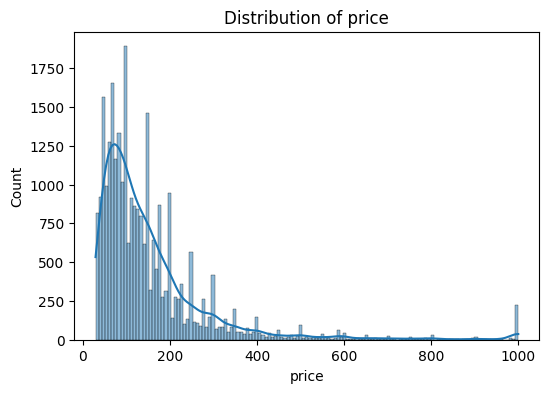

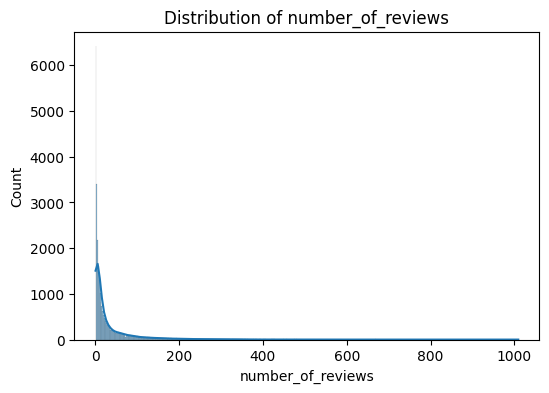

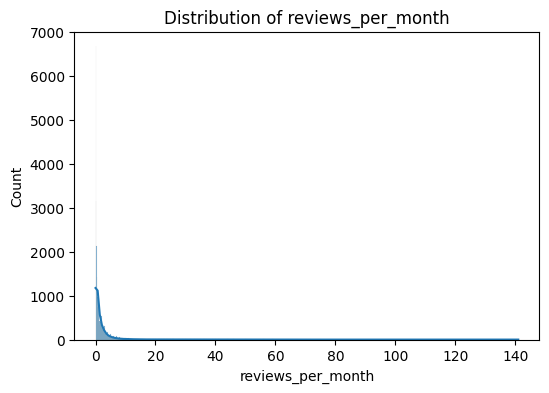

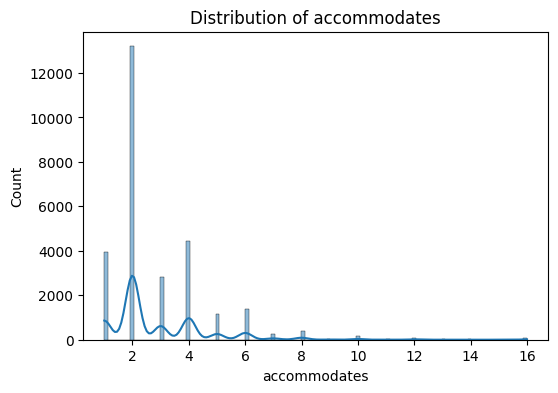

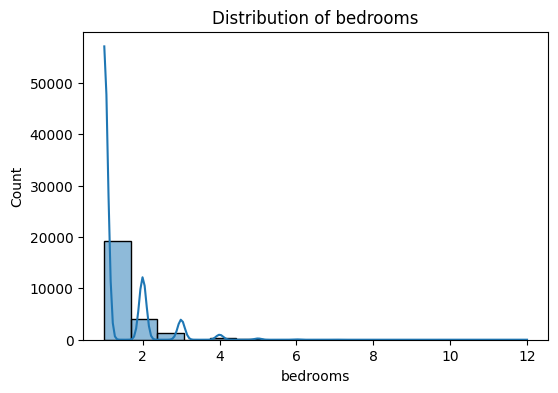

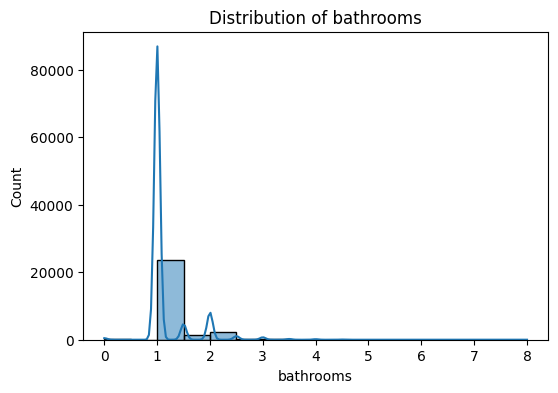

In [9]:
num_cols = ['price', 'number_of_reviews', 'reviews_per_month', 'accommodates', 'bedrooms', 'bathrooms']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

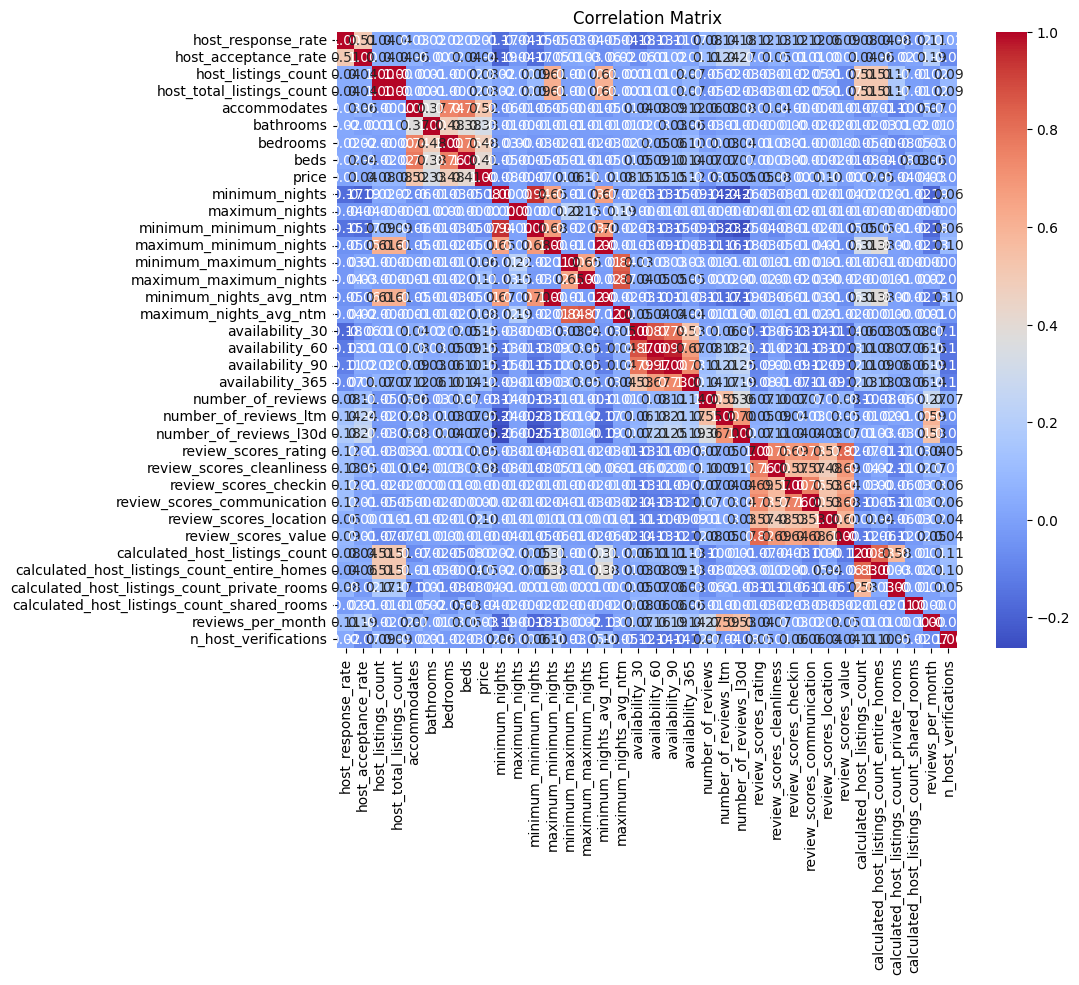

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

**Feature selection**
1. price
2. accommodates
3. bedrooms
4. bathrooms
5. beds
6. number_of_reviews
7. reviews_per_month
8. review_scores_rating
9. host_response_rate
10. host_acceptance_rate
11. calculated_host_listings
12. room_type
13. neighbourhood_group_cleansed
14. host_is_superhost
15. instant_bookable 

(drop features with too much missing data that are unlikely to be helpful)

**Data Prep**
1. Missing data:

impute missing values using median/mean/unknown

2. outliers:

cap or remove extreme values in price

3. Feature encoding:

one-hot encoding categorical values like room_type/convert boolean columns to binary 

4. Feature engineering:

aggregate features/use text features to get more info

**Model Choice**
1. regression models to predict price: logistic regression, random forest, gradient boosting

**Training/Evaluating**
1. Data:

split into 80% for training and 20% for testing/use cross-validation within training set for hyperparameter tuning

2. Baseline Model:

train logistic regression as baseline and use accuracy, precision, recall, ROC, AUC, etc.

3. Training and tuning:

use random forest and gradient boosting; grid search or randomized search for hyperparameters

4. Evaluate:

compare models using accuracy, precision, recall, ROC, AUC, etc.; check for patterns 

5. Improvement:

feature selection based on significance + relevance + model performance

experiment with feature engineering through tuning parameters (depth, estimator #)

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

**Preparing Data**

In [11]:
#columns to keep

columns_to_keep = [
    'price', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
    'number_of_reviews', 'reviews_per_month', 'review_scores_rating',
    'host_response_rate', 'host_acceptance_rate',
    'calculated_host_listings_count',
    'room_type', 'neighbourhood_group_cleansed',
    'host_is_superhost', 'instant_bookable'
]

df_model = df[columns_to_keep].copy()
df_model.head()

,price,accommodates,bedrooms,bathrooms,beds,number_of_reviews,reviews_per_month,review_scores_rating,host_response_rate,host_acceptance_rate,calculated_host_listings_count,room_type,neighbourhood_group_cleansed,host_is_superhost,instant_bookable
0,150.0,1,NaN,1.0,1.0,48,0.33,4.70,0.80,0.17,3,Entire home/apt,Manhattan,True,False
1,75.0,3,1.0,1.0,3.0,409,4.86,4.45,0.09,0.69,1,Entire home/apt,Brooklyn,True,False
2,275.0,4,2.0,1.5,2.0,2,0.02,5.00,1.00,0.25,1,Entire home/apt,Brooklyn,True,False
3,68.0,2,1.0,1.0,1.0,507,3.68,4.21,1.00,1.00,1,Private room,Manhattan,True,False
4,75.0,1,1.0,1.0,1.0,118,0.87,4.91,NaN,NaN,1,Private room,Manhattan,True,False


In [12]:
#fill in "true" and "false" as numerical boolean values

df_model['host_is_superhost'] = df_model['host_is_superhost'].map({'t': 1, 'f': 0})
df_model['instant_bookable'] = df_model['instant_bookable'].map({'t': 1, 'f': 0})

In [13]:
#turn text into temporary variables

df_model = pd.get_dummies(df_model, columns=['room_type', 'neighbourhood_group_cleansed'], drop_first=True)


In [14]:
#check missing values

df_model.isnull().sum()

price                                             0
accommodates                                      0
bedrooms                                       2918
bathrooms                                         0
beds                                           1354
number_of_reviews                                 0
reviews_per_month                                 0
review_scores_rating                              0
host_response_rate                            11843
host_acceptance_rate                          11113
calculated_host_listings_count                    0
host_is_superhost                             28022
instant_bookable                              28022
room_type_Hotel room                              0
room_type_Private room                            0
room_type_Shared room                             0
neighbourhood_group_cleansed_Brooklyn             0
neighbourhood_group_cleansed_Manhattan            0
neighbourhood_group_cleansed_Queens               0
neighbourhoo

In [40]:
#fill in

df_model['bedrooms'] = df_model['bedrooms'].fillna(df_model['bedrooms'].median())
df_model['beds'] = df_model['beds'].fillna(df_model['beds'].median())
df_model['host_is_superhost'] = df_model['host_is_superhost'].fillna(0)
df_model['instant_bookable'] = df_model['instant_bookable'].fillna(0)

df_model.isnull().sum()


price                                         0
accommodates                                  0
bedrooms                                      0
bathrooms                                     0
beds                                          0
number_of_reviews                             0
reviews_per_month                             0
review_scores_rating                          0
host_response_rate                            0
host_acceptance_rate                          0
calculated_host_listings_count                0
host_is_superhost                             0
instant_bookable                              0
room_type_Hotel room                          0
room_type_Private room                        0
room_type_Shared room                         0
neighbourhood_group_cleansed_Brooklyn         0
neighbourhood_group_cleansed_Manhattan        0
neighbourhood_group_cleansed_Queens           0
neighbourhood_group_cleansed_Staten Island    0
high_rating                             

In [42]:
#split features + target

df_model['high_rating'] = (df['review_scores_rating'] >= 4.9).astype(int)

X = df_model.drop(['review_scores_rating', 'price', 'high_rating'], axis=1)
y = df_model['high_rating']

**Fit Model**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234,stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (22417, 18)
Test set shape: (5605, 18)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_proba_log = logreg.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_proba_log))

Accuracy: 0.6290811775200713
Precision: 0.5923379174852652
Recall: 0.2659902955447728
AUC: 0.6529985281303132


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_proba_rf))

Accuracy: 0.6717216770740411
Precision: 0.6096558808423215
Recall: 0.5235994706660785
AUC: 0.7072534050036169


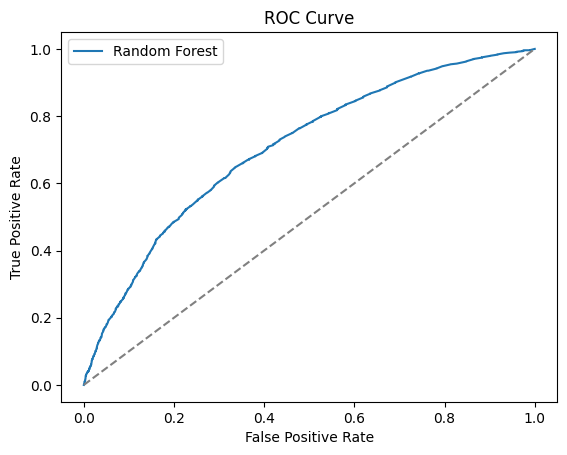

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Improve Model**

In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [32]:
#random forest classifier

rf_model = RandomForestClassifier(random_state=1234)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("Random Forest Precision:", round(precision_score(y_test, y_pred_rf), 2))
print("Random Forest Recall:", round(recall_score(y_test, y_pred_rf), 2))
print("Random Forest ROC AUC:", round(roc_auc_score(y_test, y_proba_rf), 2))

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=1234),
    rf_param_grid,
    cv=3,
    scoring='roc_auc',
)

rf_grid.fit(X_train, y_train)
print("Best RF parameters:", rf_grid.best_params_)

best_rf = rf_grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

print("Tuned RF Accuracy:", round(accuracy_score(y_test, y_pred_best_rf), 2))
print("Tuned RF Precision:", round(precision_score(y_test, y_pred_best_rf), 2))
print("Tuned RF Recall:", round(recall_score(y_test, y_pred_best_rf), 2))
print("Tuned RF ROC AUC:", round(roc_auc_score(y_test, y_proba_best_rf), 2))

Random Forest Accuracy: 0.67
Random Forest Precision: 0.61
Random Forest Recall: 0.53
Random Forest ROC AUC: 0.71
Best RF parameters: {'max_depth': 10, 'n_estimators': 200}
Tuned RF Accuracy: 0.7
Tuned RF Precision: 0.67
Tuned RF Recall: 0.51
Tuned RF ROC AUC: 0.74


In [33]:
#gradient boosting classifier

gb_model = GradientBoostingClassifier(random_state=1234)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb), 2))
print("Gradient Boosting Precision:", round(precision_score(y_test, y_pred_gb), 2))
print("Gradient Boosting Recall:", round(recall_score(y_test, y_pred_gb), 2))
print("Gradient Boosting ROC AUC:", round(roc_auc_score(y_test, y_proba_gb), 2))

gb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=1234),
    gb_param_grid,
    cv=3,
    scoring='roc_auc',
)

gb_grid.fit(X_train, y_train)
print("Best GB parameters:", gb_grid.best_params_)

best_gb = gb_grid.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)
y_proba_best_gb = best_gb.predict_proba(X_test)[:, 1]

print("Tuned GB Accuracy:", round(accuracy_score(y_test, y_pred_best_gb), 2))
print("Tuned GB Precision:", round(precision_score(y_test, y_pred_best_gb), 2))
print("Tuned GB Recall:", round(recall_score(y_test, y_pred_best_gb), 2))
print("Tuned GB ROC AUC:", round(roc_auc_score(y_test, y_proba_best_gb), 2))

Gradient Boosting Accuracy: 0.7
Gradient Boosting Precision: 0.67
Gradient Boosting Recall: 0.5
Gradient Boosting ROC AUC: 0.74
Best GB parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Tuned GB Accuracy: 0.7
Tuned GB Precision: 0.67
Tuned GB Recall: 0.51
Tuned GB ROC AUC: 0.74


In [45]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_gb, X, y, cv=5, scoring='roc_auc')
print(f'Gradient Boosting 5-fold CV AUC scores: {cv_scores}')
print(f'Mean AUC: {cv_scores.mean():.3f}, Std: {cv_scores.std():.3f}')

Gradient Boosting 5-fold CV AUC scores: [0.64832384 0.68278222 0.70592576 0.71670174 0.73652231]
Mean AUC: 0.698, Std: 0.030


In [37]:
example = X_test.iloc[0]  # just pick the first test sample
prediction = best_gb.predict([example])
probability = best_gb.predict_proba([example])[:, 1]

print("Predicted class:", prediction[0])  # 0 or 1
print("Probability of high rating:", probability[0])

Predicted class: 0
Probability of high rating: 0.4656332215005113


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


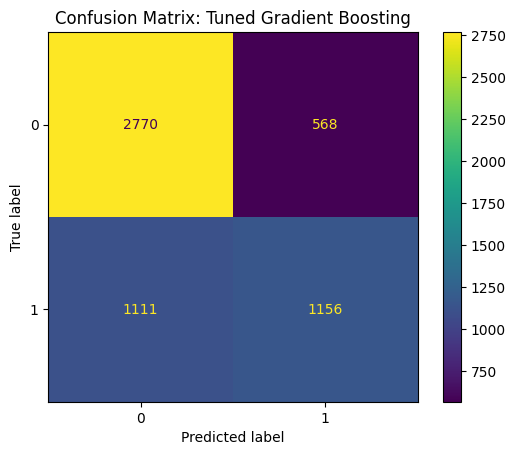

              precision    recall  f1-score   support

           0       0.71      0.83      0.77      3338
           1       0.67      0.51      0.58      2267

    accuracy                           0.70      5605
   macro avg       0.69      0.67      0.67      5605
weighted avg       0.70      0.70      0.69      5605



In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_gb, X_test, y_test)
plt.title("Confusion Matrix: Tuned Gradient Boosting")
plt.show()

# Classification report
y_pred_best_gb = best_gb.predict(X_test)
print(classification_report(y_test, y_pred_best_gb))

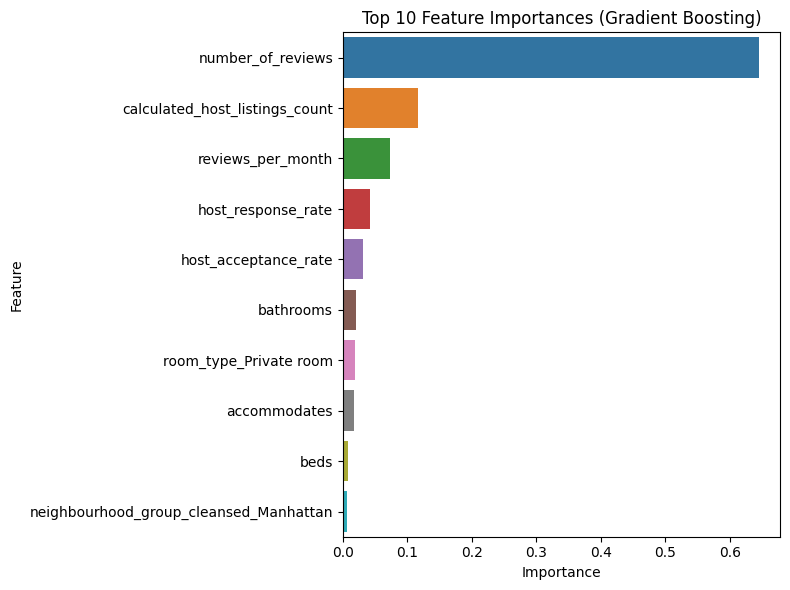

In [35]:
importances = best_gb.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances (Gradient Boosting)')
plt.tight_layout()
plt.show()

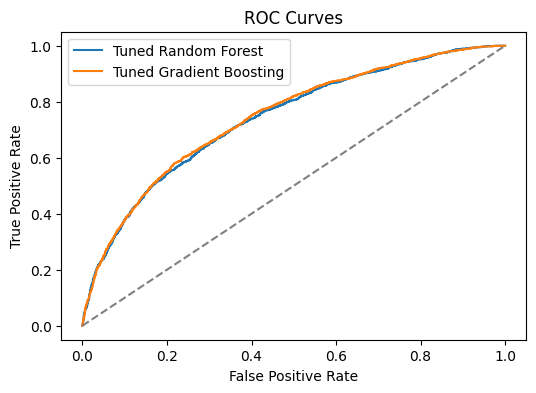

In [34]:
#graph comparison

from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_best_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_best_gb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label='Tuned Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Tuned Gradient Boosting')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

I evaluated multiple classification models including logistic regression, random forest, and gradient boosting, along with their tuned versions using GridSearchCV. Among the untuned models, the random forest outpuerformed logistic regression and gradient boosting across all metrics, getting an AUC of 0.71 compared to 0.65 for logistic regression and 0.74 for gradient boosting. However, after hyperparameter tuning, both random forest and gradient boosting improved to an AUC of 0.74 (with gradient boosting slightly outperforming in the ROC curve and recall score).

The tuned gradient boosting model had an accuracy of 0.70, precision of 0.67, recall of 0.51, and AUC of 0.74. The feature importance plot showed that only a small group of features carried most of the predictive power. THis suggests that we can reduce the feature selection in future iterations. The confusion matric also showed that while the model correctly predicted a good number of positives, false negatives were significant. There is definitely room for improving recall further. 

To validate the model behavior, I tested predictions of specific listings from the test set. For example, the model outputs both a predicted class -- higher rating or not -- and also a probability score telling us the confidence. This allows us to understand borderline cases where the model is not confident. The default classification thredhold of 0.5 might not be optimal, and adjusting this thredhold can help tune the balance between precision and recall. 

In conslusion, gradient boosting with hyperparameter tuning was the best performing model in this project. It was able to achieve the best balance between precision, AUC, and recall. The results also point to the importance of ensemble methods and model optimization for improving generalization and predictive power.